In [180]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [181]:
for i in range(8):
    if i==0:
        train = pd.read_csv('salida/resultados/RTE3/DEV_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/RTE3/DEV_'+str(i+1)+'.csv.csv')
        train=pd.concat([train,temp])

In [182]:
#train["relaciones"]=train["relaciones"]+train["antonimos"]

<Axes: title={'center': 'antonimos'}, xlabel='CLASS'>

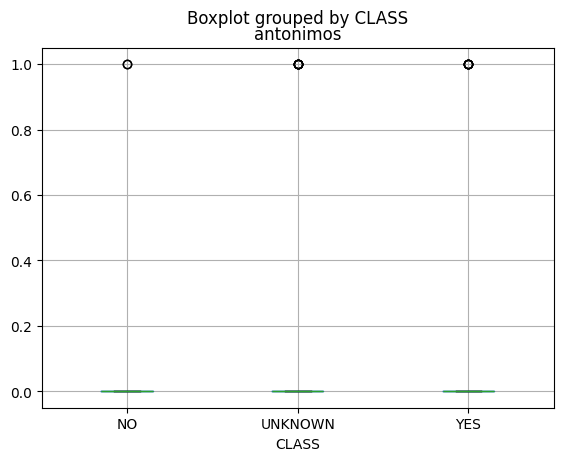

In [183]:
train.boxplot(by="CLASS",column=["antonimos"])

In [184]:
#train=train.drop(["suma","distancias","entropias","antonimos"],axis=1)
train

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,CLASS
0,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,YES
1,-0.000762,3178.86960,1.584,1.412555,8.697627,0.467034,0,5,0.478848,NO
2,-0.280848,2433.71730,2.986,1.415133,5.036993,1.305065,0,1,0.616979,UNKNOWN
3,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,YES
4,-0.140882,796.06140,1.530,0.716918,0.978448,0.231184,0,0,0.037146,YES
...,...,...,...,...,...,...,...,...,...,...
95,-0.019967,759.53076,2.055,0.703017,0.616965,0.424818,0,0,0.258356,UNKNOWN
96,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,YES
97,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,UNKNOWN
98,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,NO


In [185]:
X = np.array(train.drop(['CLASS'],axis=1))
y_ = np.array(train['CLASS'])

In [186]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

In [187]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

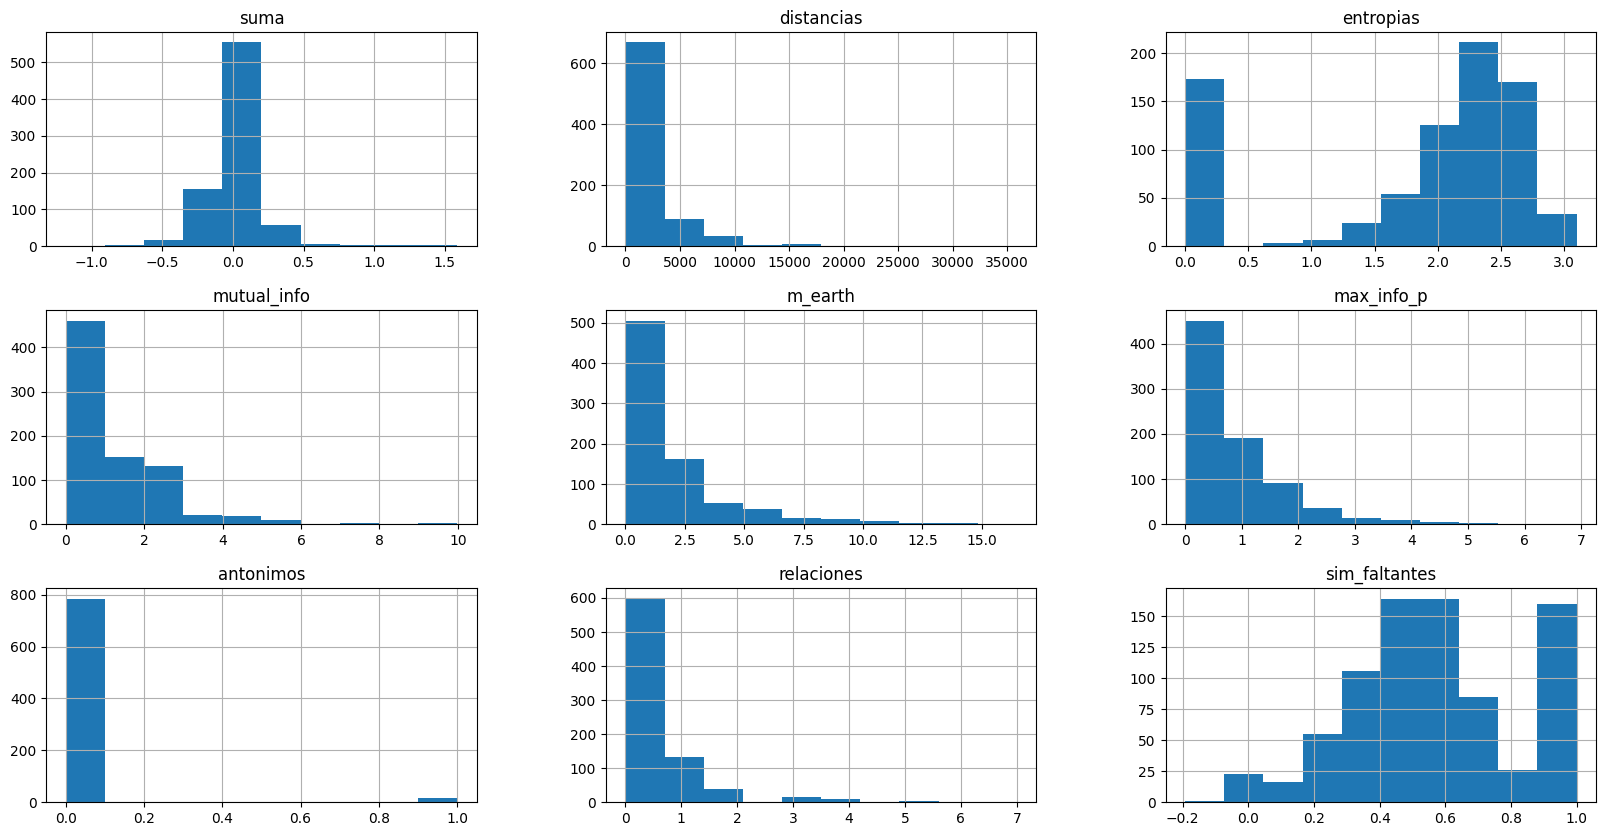

In [188]:
train.hist(figsize=(20,10))
plt.show()

In [189]:
for i in range(8):
    if i==0:
        test = pd.read_csv('salida/resultados/RTE3/TEST_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/RTE3/TEST_'+str(i+1)+'.csv.csv')
        test=pd.concat([test,temp])

In [190]:
#test["relaciones"]=test["relaciones"]+test["antonimos"]

In [191]:
#test=test.drop(["suma","distancias","entropias","antonimos"],axis=1)
test

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,CLASS
0,-0.176353,4051.2014,2.093,1.415909e+00,7.061271,0.919573,0,0,0.457370,YES
1,-0.006087,1441.6440,2.149,7.099558e-01,0.701502,0.393066,0,0,0.338005,YES
2,0.000000,536.2693,0.000,1.609823e-13,4.289287,0.000000,0,0,0.000000,YES
3,0.000000,0.0000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,YES
4,-0.068107,863.1677,2.468,6.870561e-01,0.973838,0.412710,0,0,0.413161,NO
...,...,...,...,...,...,...,...,...,...,...
95,-0.107113,1861.5322,1.864,7.052404e-01,1.067078,0.276587,0,1,0.215729,YES
96,0.000000,0.0000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,NO
97,0.042652,1257.3066,2.208,6.977210e-01,0.589826,0.467463,0,0,0.485553,UNKNOWN
98,0.021256,632.9640,1.549,6.852396e-01,1.010164,0.353093,0,0,0.234342,UNKNOWN


In [192]:
X_t = np.array(test.drop(['CLASS'],axis=1))
y_t = np.array(test['CLASS'])

In [193]:
# RTE3
y_test=[]
for i in y_t:
    if i == "YES":
        y_test.append(1)
    else:
        y_test.append(0)

In [194]:
scaler = preprocessing.StandardScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [195]:
# grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
# logreg=linear_model.LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=20)
# logreg_cv.fit(X_train,y_train)

In [196]:
# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [197]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [198]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [199]:
model.decision_function(X)

array([ 9.19169596e-01, -2.46346674e-01,  2.12198470e-01,  9.19169596e-01,
        7.77996257e-02,  5.37124313e-01,  9.19169596e-01,  9.19169596e-01,
       -1.19026420e-02, -1.06066929e+00,  1.14705533e-01,  9.19169596e-01,
        2.92529893e-01,  4.67845378e-01,  5.89567392e-01,  9.19169596e-01,
       -3.97337594e-01,  4.15016067e-01,  4.95185585e-01,  4.05886116e-01,
        4.29029349e-01,  2.48319426e-01,  6.01156659e-01,  4.41959633e-01,
       -6.53062173e-02,  2.56901010e-01,  3.31267547e-01,  2.90548120e-01,
        2.73723580e-01,  3.75435868e-01,  4.86650439e-01,  2.28674087e-01,
        2.67187216e-01,  3.49031785e-01,  3.87807563e-01,  2.45525525e-01,
        3.25258743e-01,  5.43437574e-01,  3.52237033e-01,  9.19169596e-01,
        3.88641267e-01,  3.15386173e-01, -7.20720774e-01,  4.49026496e-01,
        3.82350353e-01,  3.47350955e-01,  3.38729562e-01,  4.17661429e-01,
        3.57950998e-01,  4.70381167e-01, -1.32207119e-01,  4.79535093e-01,
       -8.20886049e-01,  

In [200]:
labels=train.columns[:-1]
labels

Index(['suma', 'distancias', 'entropias', 'mutual_info', 'm_earth',
       'max_info_p', 'antonimos', 'relaciones', 'sim_faltantes'],
      dtype='object')

In [201]:
model.classes_

array([0, 1])

In [202]:
model.coef_[0]

array([ 8.11433346e-02, -9.79483587e-02, -4.43902249e-02, -1.57747368e+00,
        2.77822302e-01,  6.39142414e-01,  6.08188937e-04, -9.58415110e-02,
        2.15830812e-02])

In [203]:
coeficientes=model.coef_[0]

In [204]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  5 max_info_p 3 mutual_info


In [205]:
n_columns=train.shape[1]-1

In [206]:
n_columns

9

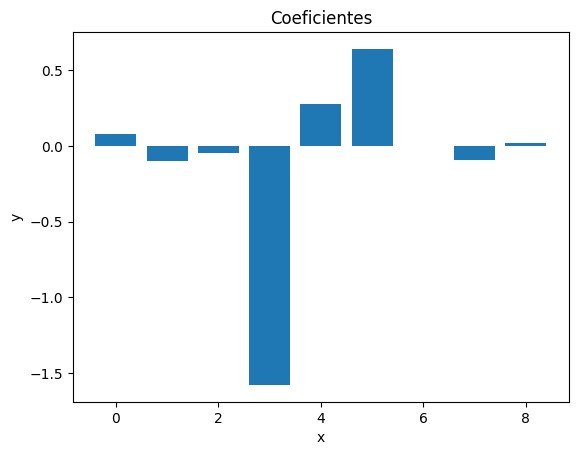

In [207]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [208]:
predictions = model.predict(X_test)

In [209]:
print(confusion_matrix(y_test, predictions))

[[187 203]
 [125 285]]


In [210]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.59
precision:  0.58
recall 0.7
f1_score:  0.63
matthews_score:  0.18


In [211]:
X_train.shape

(800, 9)

In [212]:
X_test.shape

(800, 9)

In [213]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [214]:
validation_size = 0.20
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [215]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.610000 (0.063722)


In [216]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.760000 (0.082904)


In [217]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.670000 (0.060886)


In [218]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.230000 (0.110065)


In [219]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

In [220]:
#linear_model

In [221]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [222]:
y_predict = model.predict(X_test)
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       0.48      0.60      0.53       312
           1       0.70      0.58      0.63       488

    accuracy                           0.59       800
   macro avg       0.59      0.59      0.58       800
weighted avg       0.61      0.59      0.59       800



In [223]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-1])
shap_values = explainer(X_test)

In [224]:
explainer.expected_value

-0.09921962496366696

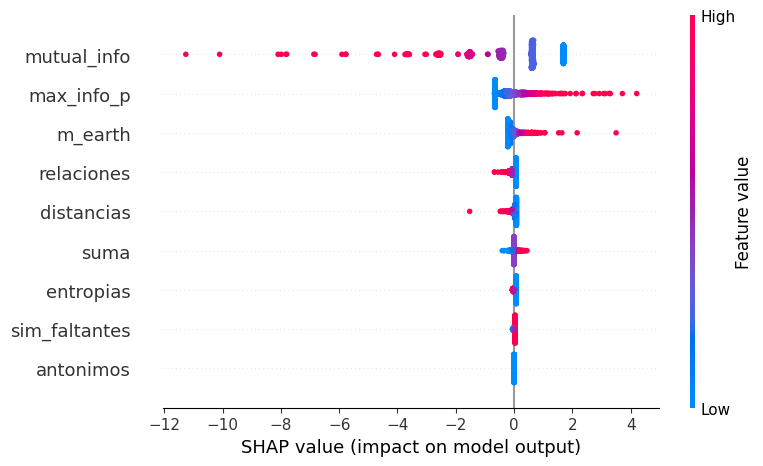

In [225]:
shap.plots.beeswarm(shap_values)

In [226]:
ind = 1
shap.plots.force(shap_values[ind])

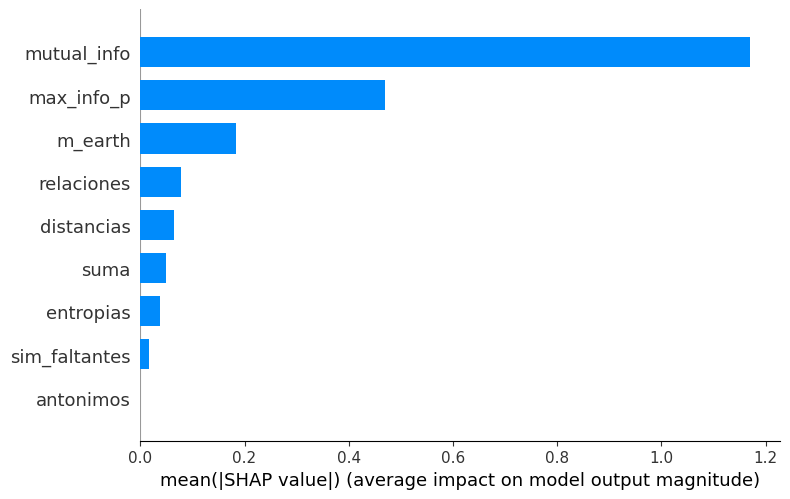

In [227]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

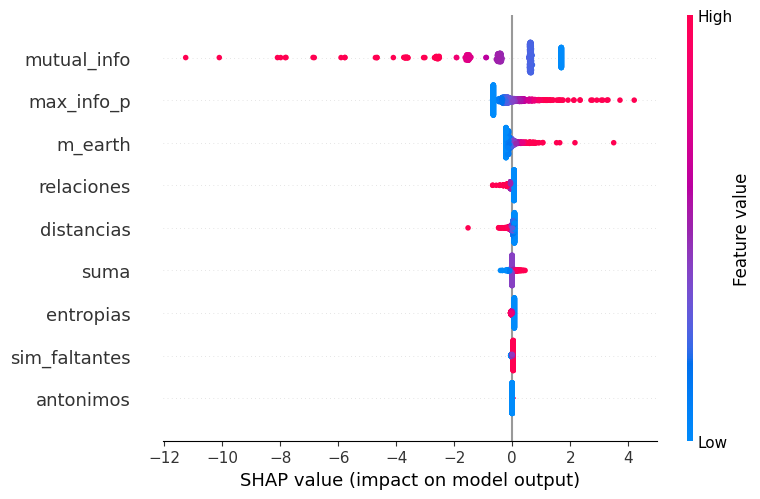

In [228]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

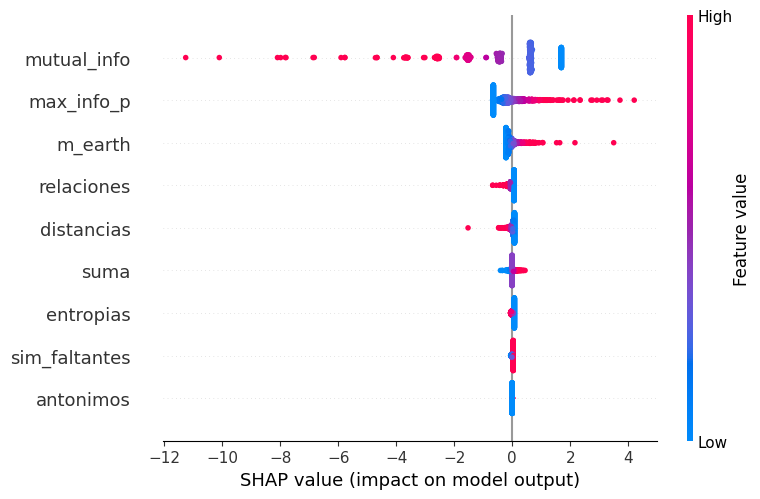

In [229]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [230]:
shap_values[2:,]

.values =
array([[-5.84127459e-03,  5.20100935e-02,  7.28836181e-02, ...,
         1.56449994e-05,  6.32404124e-02, -4.04958733e-02],
       [-5.84127459e-03,  7.69236885e-02,  7.28836181e-02, ...,
         1.56449994e-05,  6.32404124e-02,  3.44459273e-02],
       [-3.95237845e-02,  3.68232940e-02, -3.35972596e-02, ...,
         1.56449994e-05,  6.32404124e-02, -9.53281459e-03],
       ...,
       [ 1.52525513e-02,  1.85126861e-02, -2.23796631e-02, ...,
         1.56449994e-05,  6.32404124e-02, -4.10764921e-03],
       [ 4.67102161e-03,  4.75179240e-02,  6.05262965e-03, ...,
         1.56449994e-05,  6.32404124e-02, -2.29338357e-02],
       [-5.84127459e-03,  7.69236885e-02,  7.28836181e-02, ...,
         1.56449994e-05,  6.32404124e-02,  3.44459273e-02]])

.base_values =
array([-0.09921962, -0.09921962, -0.09921962, -0.09921962, -0.09921962,
       -0.09921962, -0.09921962, -0.09921962, -0.09921962, -0.09921962,
       -0.09921962, -0.09921962, -0.09921962, -0.09921962, -0.09921962,
 

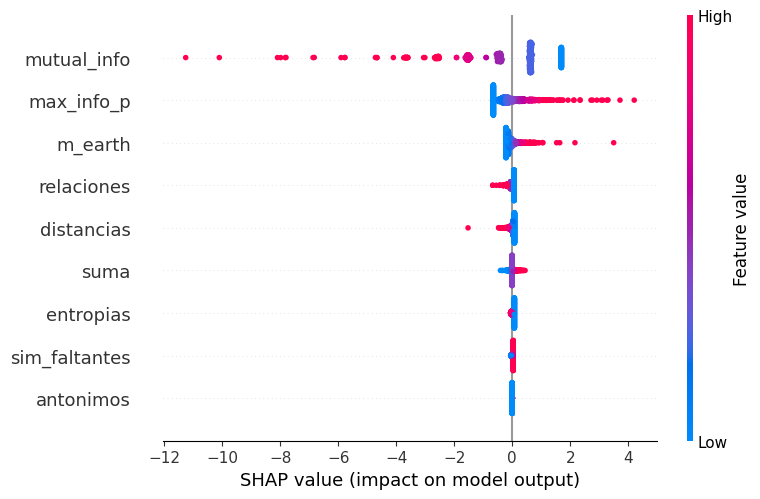

In [231]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [232]:
explainer.expected_value

-0.09921962496366696

In [233]:
shap_values.shape

(800, 9)

In [235]:
shap_values_Tree_tr = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values_Tree_tr, X_train)

InvalidModelError: Model type not yet supported by TreeExplainer: <class 'sklearn.linear_model._logistic.LogisticRegression'>